In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Table of Contents

1. Experiment 1: Linear Data / 1 Feature / Minimal Noise
2. ...

# Experiment 1: Linear Data / 1 Feature / Minimal Noise
## Create Data

In [16]:
X, y, true_coef = make_regression(
    n_samples=10,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=1,
    random_state=42,
    coef=True
)

## Plot Data

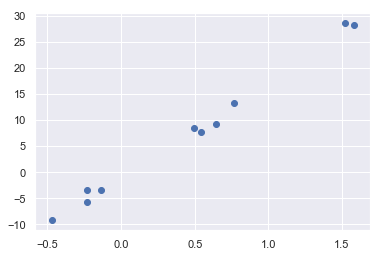

In [17]:
plt.scatter(X, y)

## Run Linear Regression

In [18]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Get model coefficients

In [21]:
b = linreg.intercept_
m = linreg.coef_

### Score model using R^2

In [23]:
linreg.score(X, y)

0.9930596702737767

## Get predictions for y

In [28]:
y_predicted = linreg.predict(X)

## Plot Model over Data

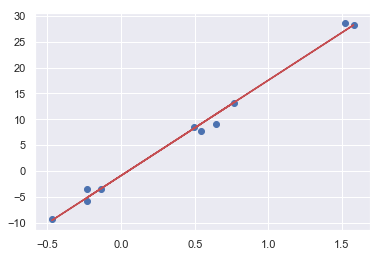

In [29]:
plt.scatter(X, y)
plt.plot(X, y_predicted, color='r')

## Plot Residuals
### Residuals vs. X

In [30]:
residuals = y - y_predicted

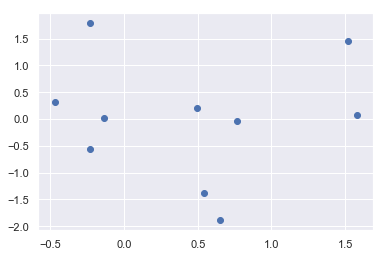

In [31]:
plt.scatter(X, residuals)

### Residuals vs. Y

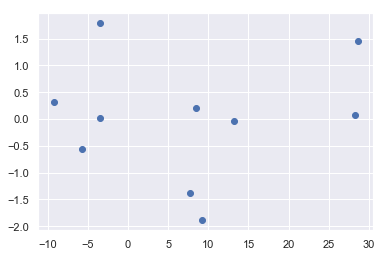

In [32]:
plt.scatter(y, residuals)

### Residuals vs. Y-Predicted

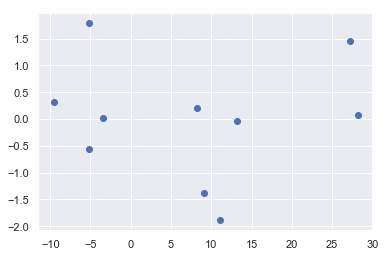

In [33]:
plt.scatter(y_predicted, residuals)

# Experiment 2: Linear Data / 1 Feature / 10 Samples / Variable Noise

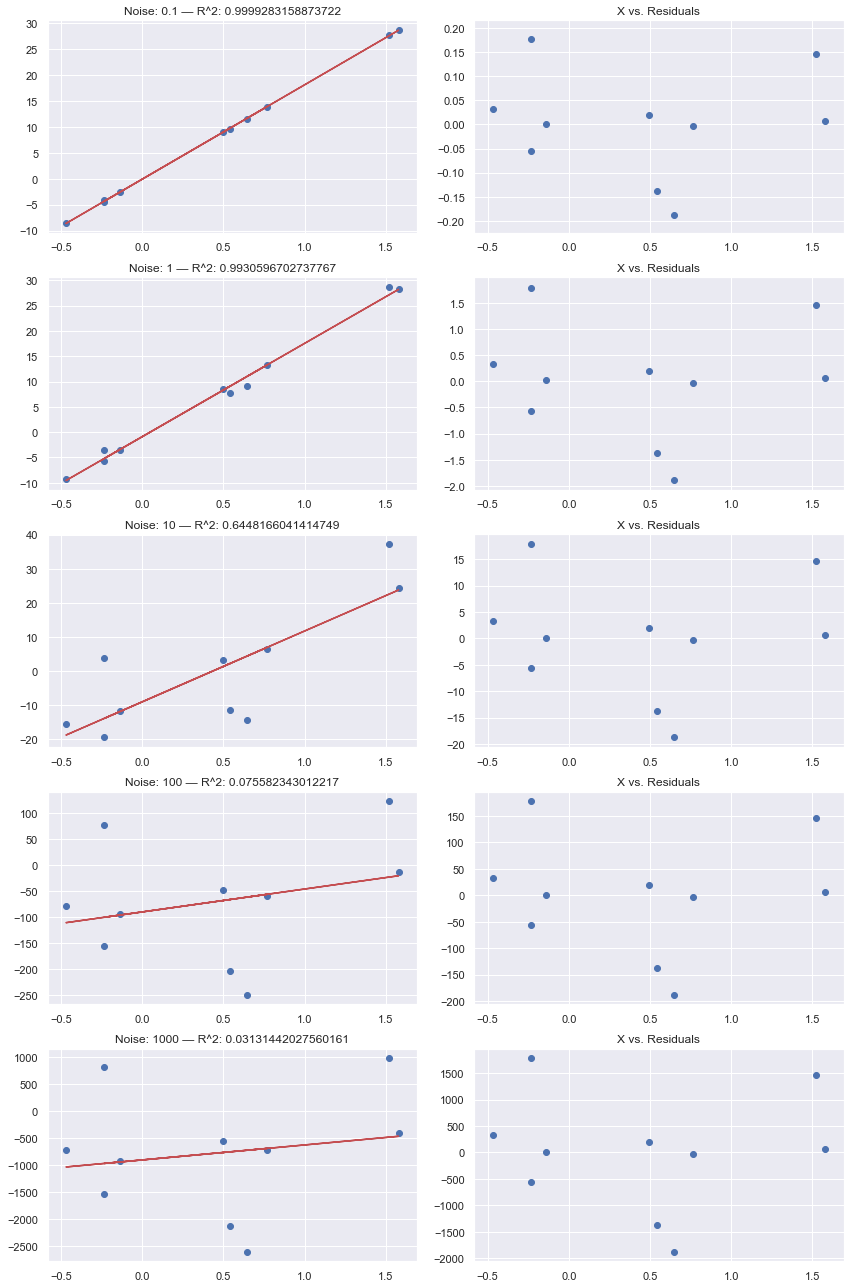

In [57]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options), 2, figsize=(12, 18))

for i, noise in enumerate(noise_options):
    ax_model = axs[i][0]
    ax_residuals = axs[i][1]

    X, y, true_coef = make_regression(
        n_samples=10,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model.scatter(X, y)
    ax_model.plot(X, y_predicted, color='r')
    ax_model.set_title("Noise: {} — R^2: {}".format(noise, linreg.score(X, y)))

    residuals = y - y_predicted

    ax_residuals.scatter(X, residuals)
    ax_residuals.set_title("X vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 3: Linear Data / 1 Feature / 100 Samples / Variable Noise

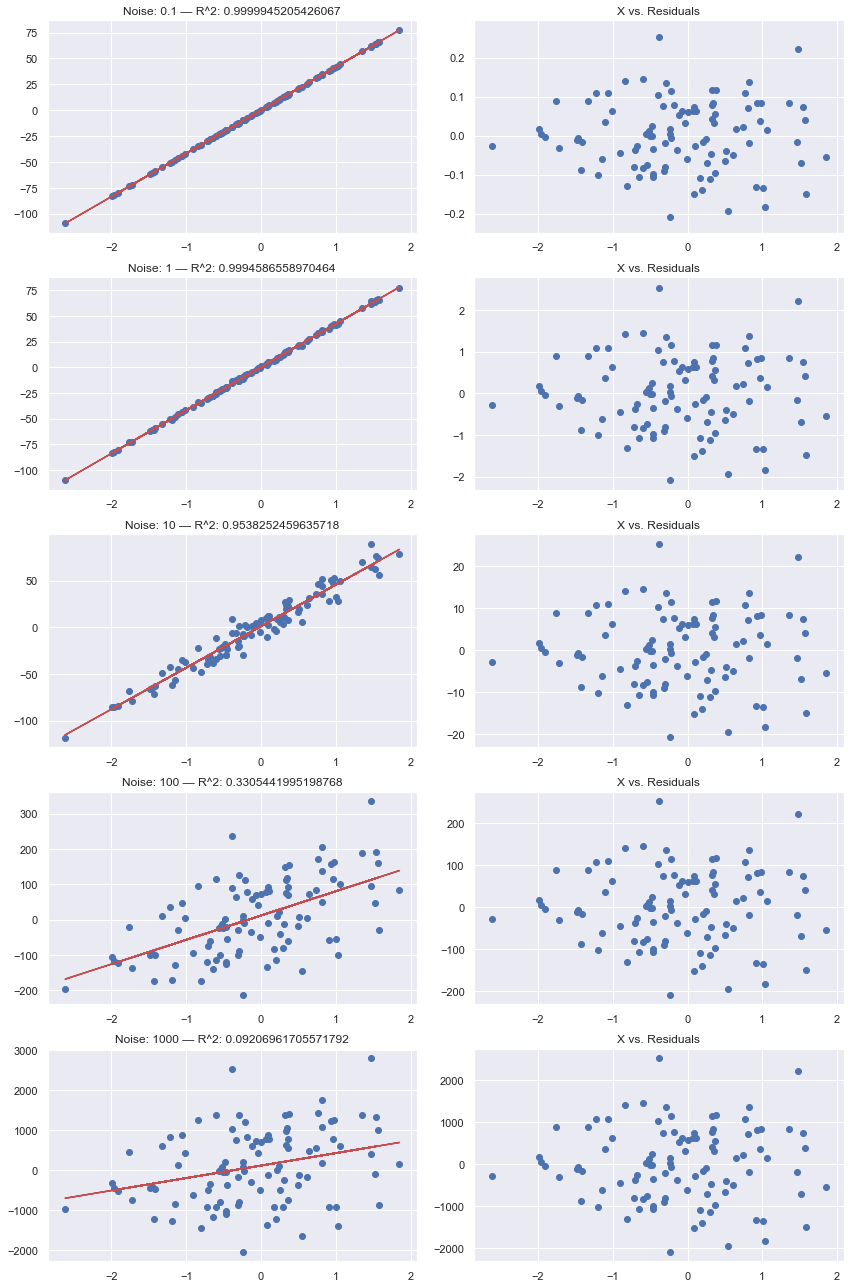

In [58]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options), 2, figsize=(12, 18))

for i, noise in enumerate(noise_options):
    ax_model = axs[i][0]
    ax_residuals = axs[i][1]

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model.scatter(X, y)
    ax_model.plot(X, y_predicted, color='r')
    ax_model.set_title("Noise: {} — R^2: {}".format(noise, linreg.score(X, y)))

    residuals = y - y_predicted

    ax_residuals.scatter(X, residuals)
    ax_residuals.set_title("X vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 4: Linear Data / 2 Features, 2 Informative / 10 Samples / Variable Noise

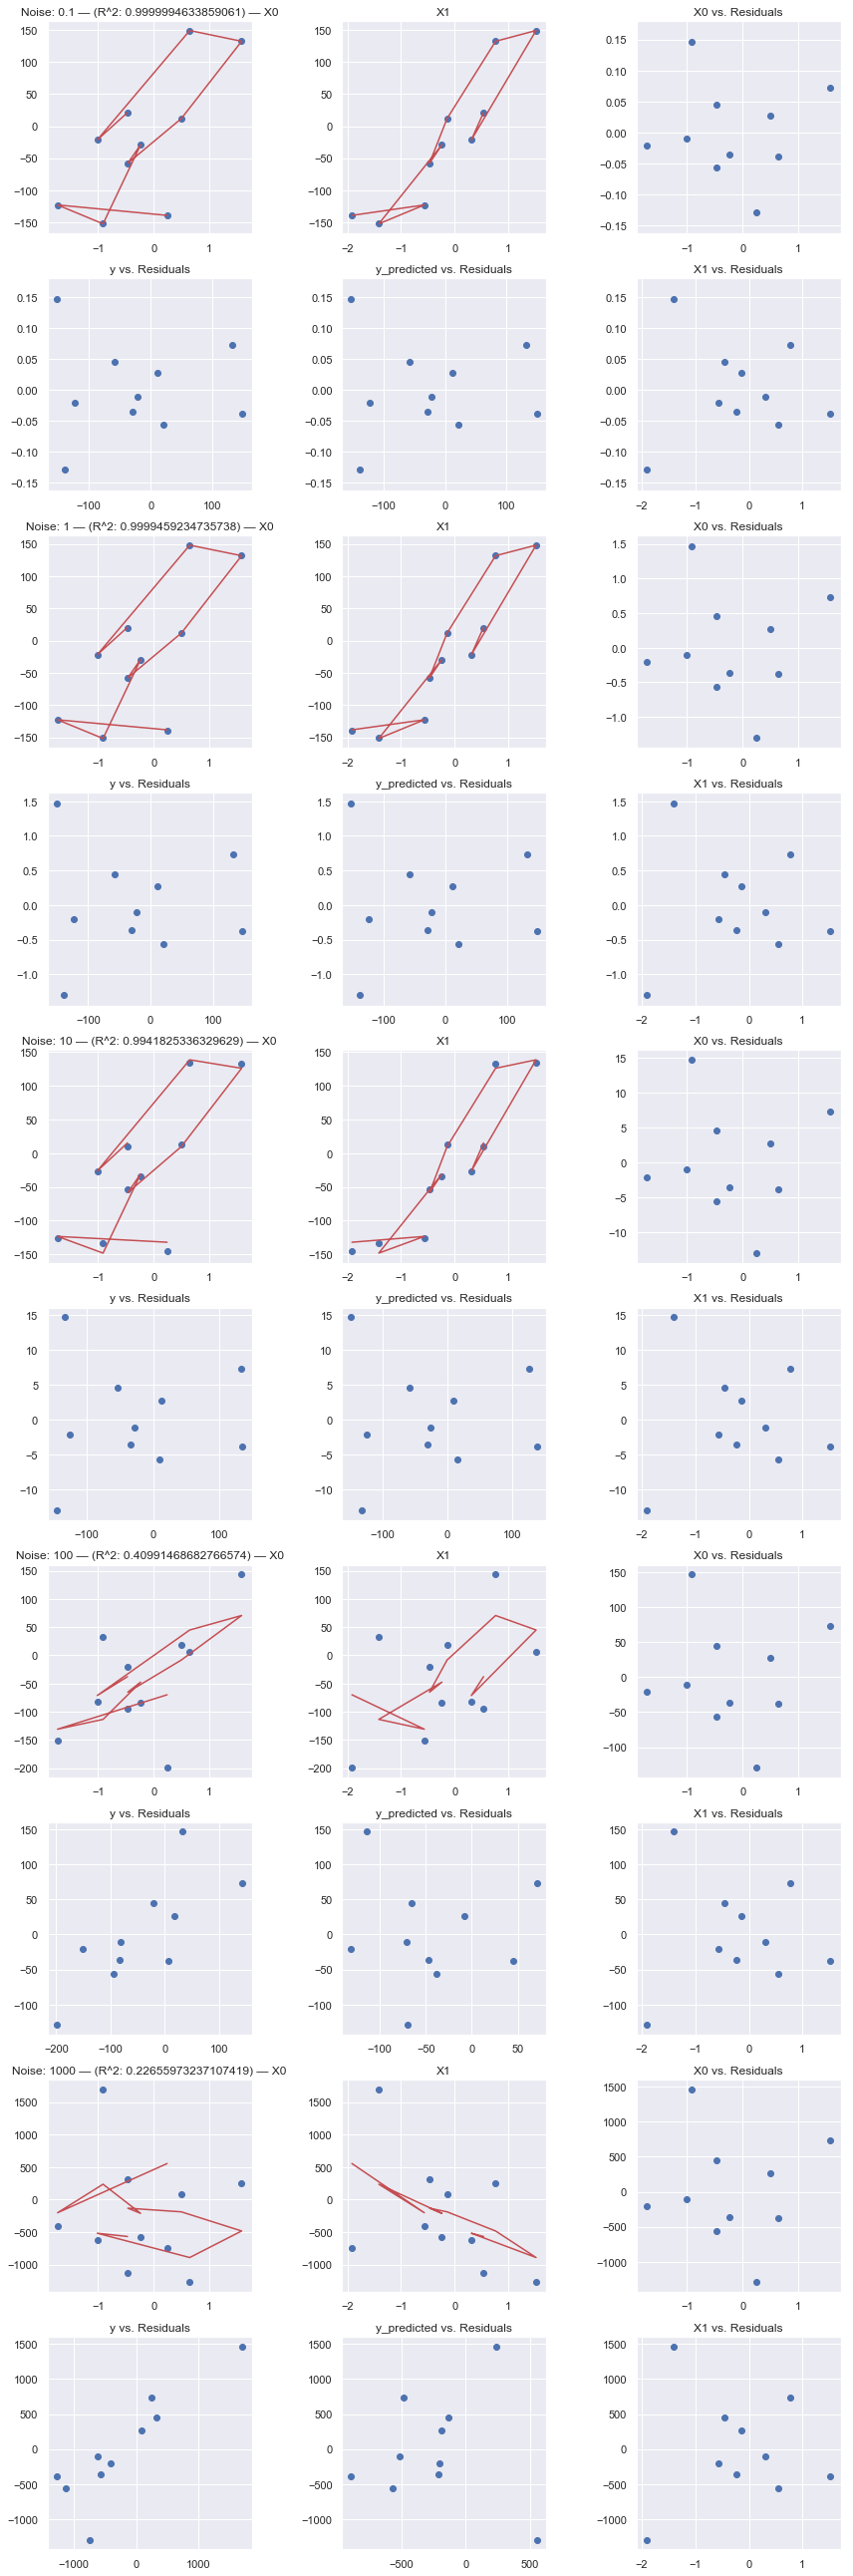

In [59]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=10,
        n_features=2,
        n_informative=2,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 5: Linear Data / 2 Features, 1 Informative / 10 Samples / Variable Noise

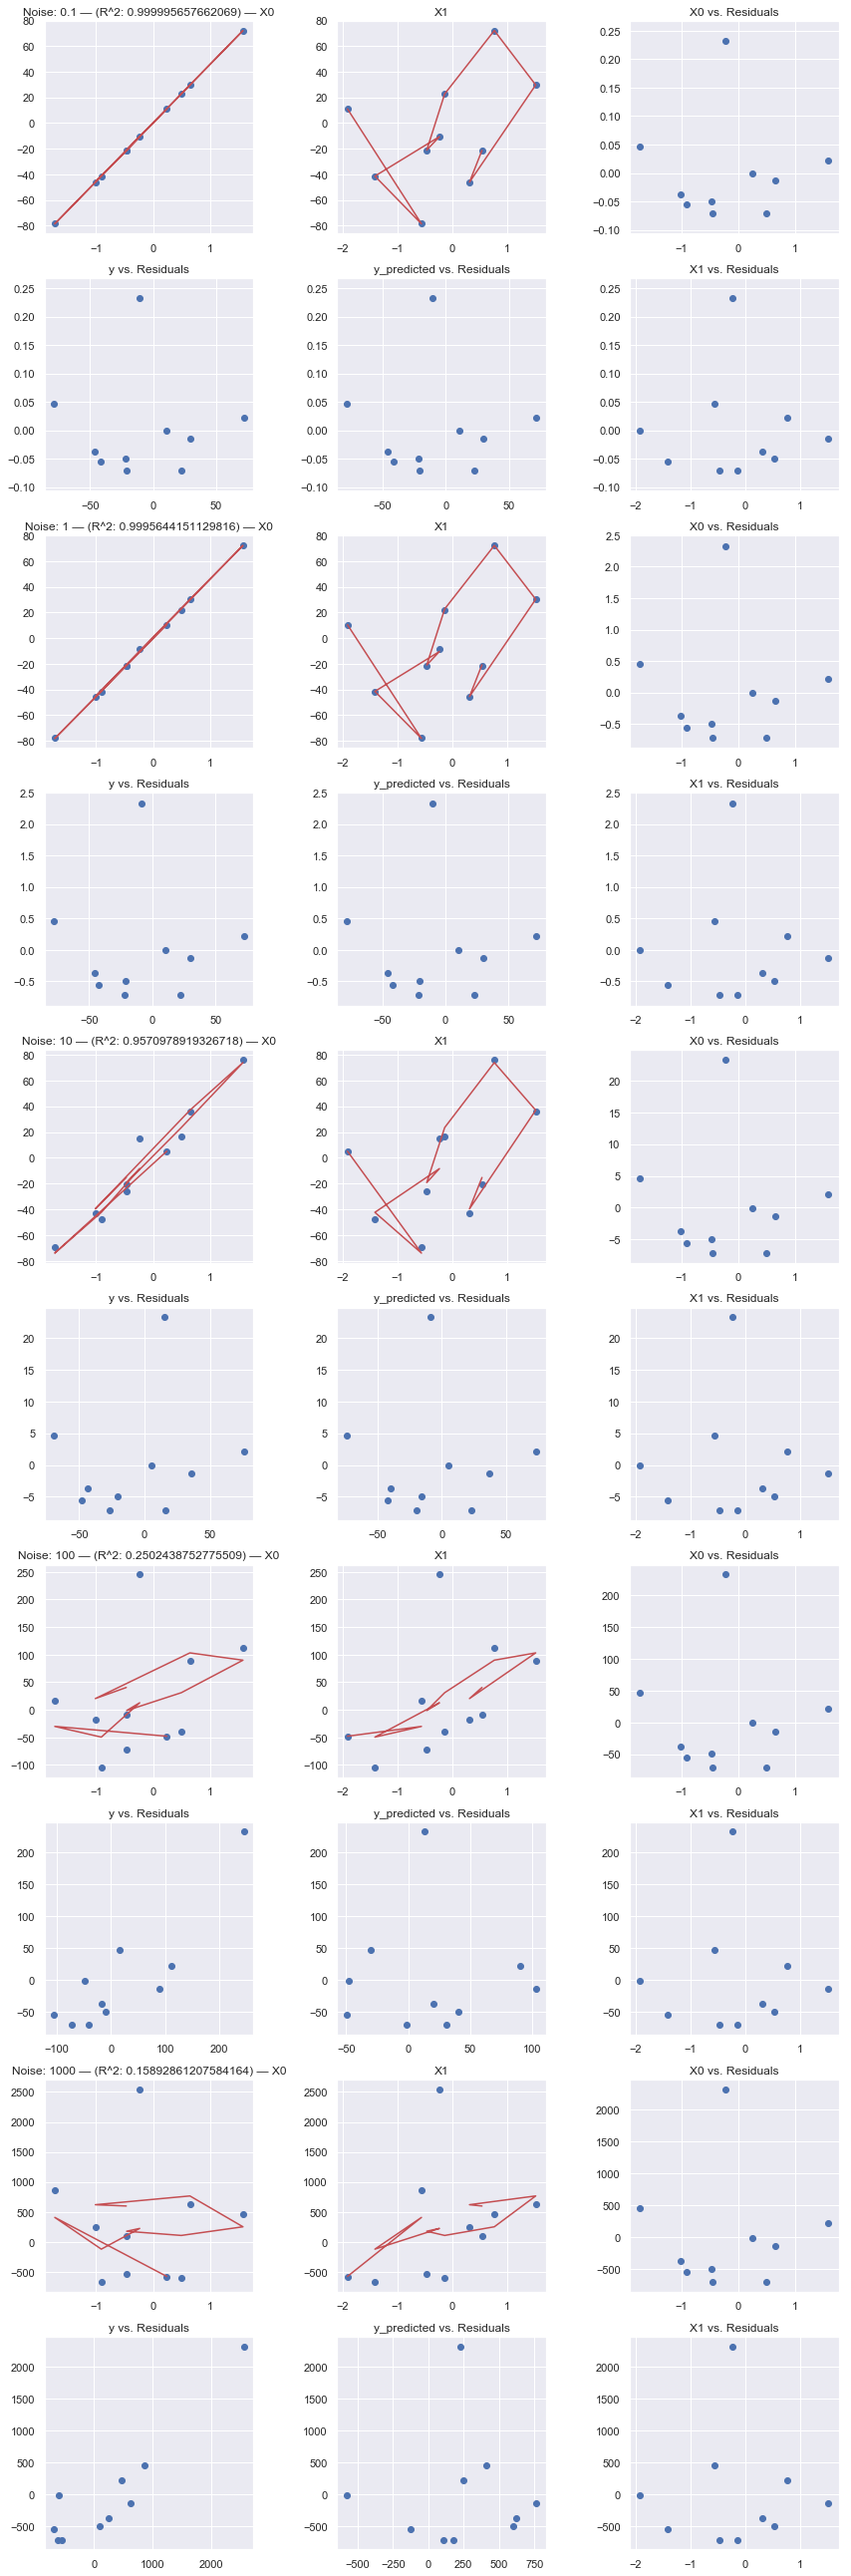

In [60]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=10,
        n_features=2,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 6: Linear Data / 2 Features, 2 Informative / 100 Samples / Variable Noise

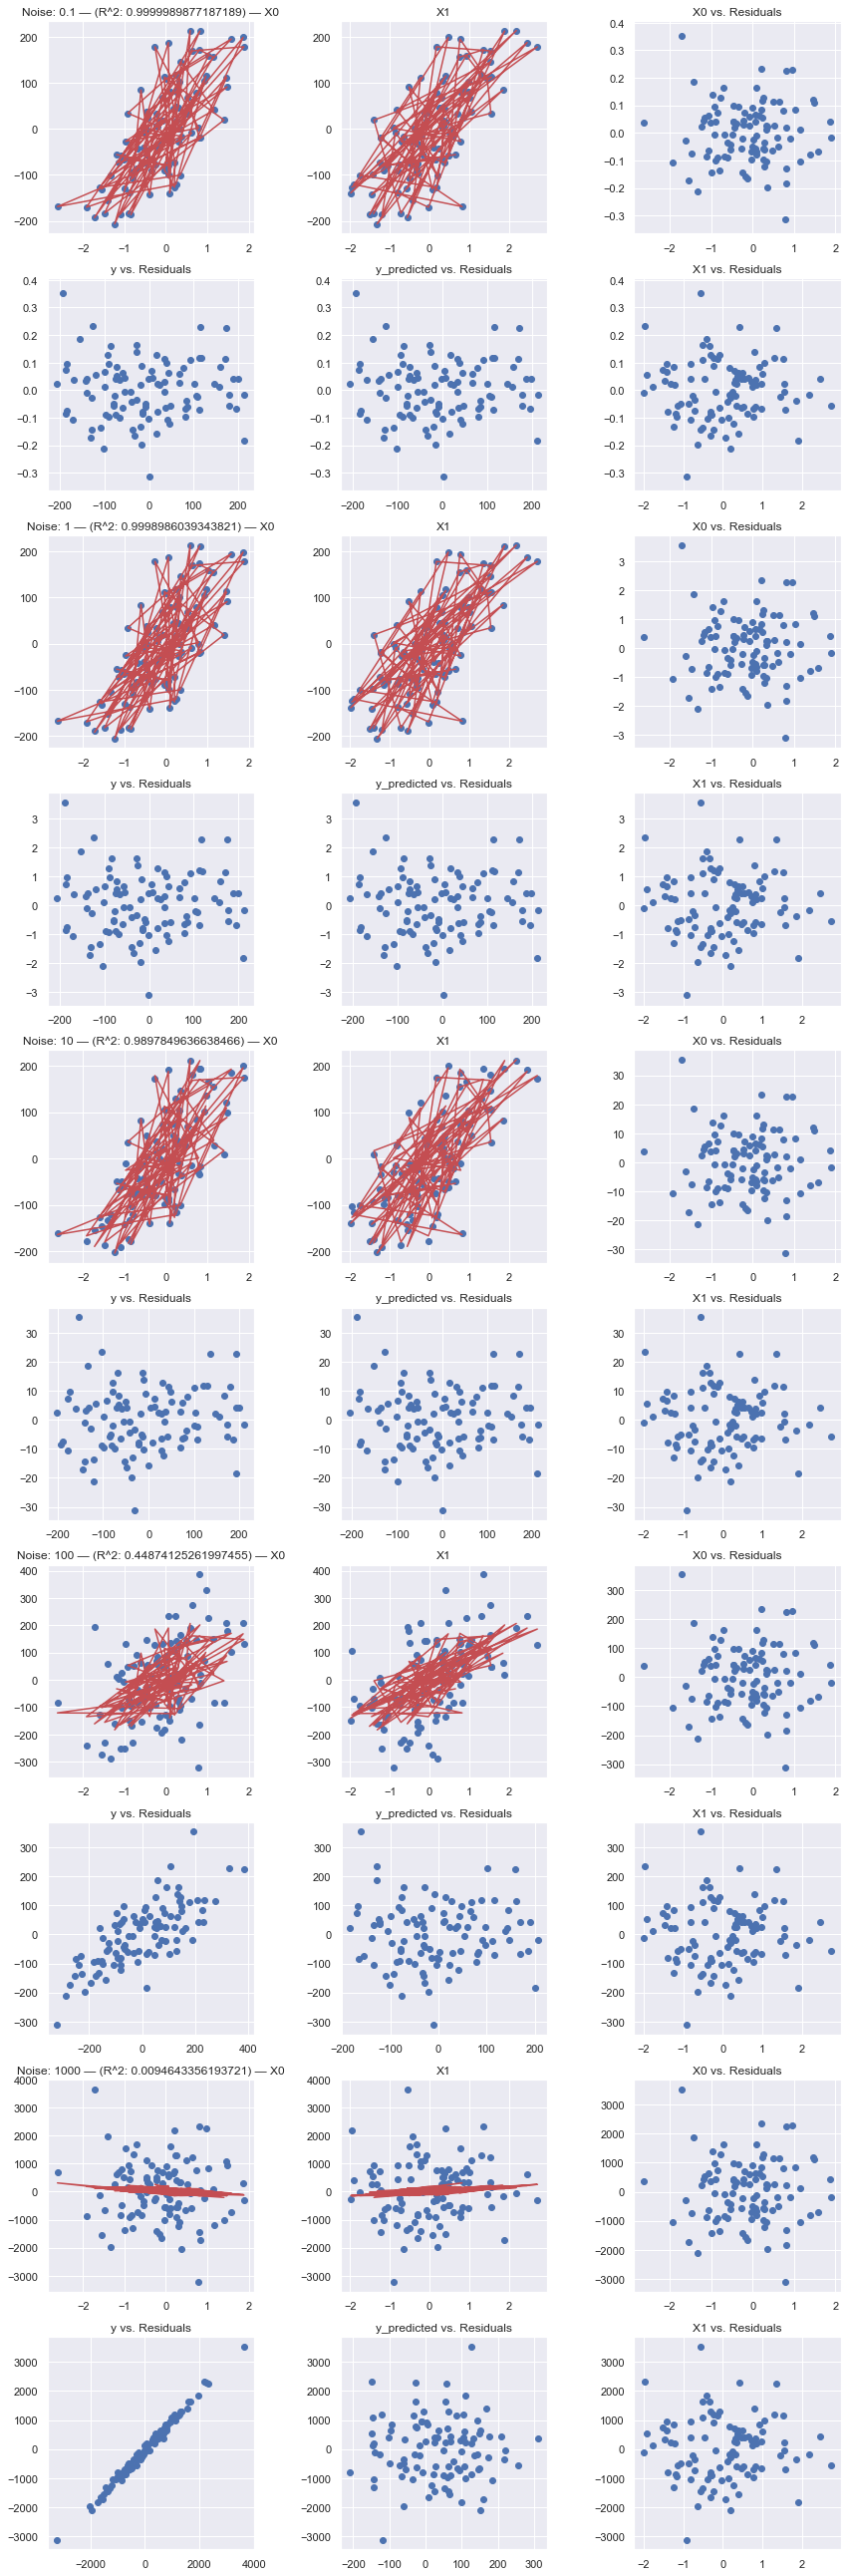

In [61]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=2,
        n_informative=2,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 7: Non-Linear Data / 1 Feature, 1 Informative / 10 Samples / Variable Noise / Linear Attempted Fit

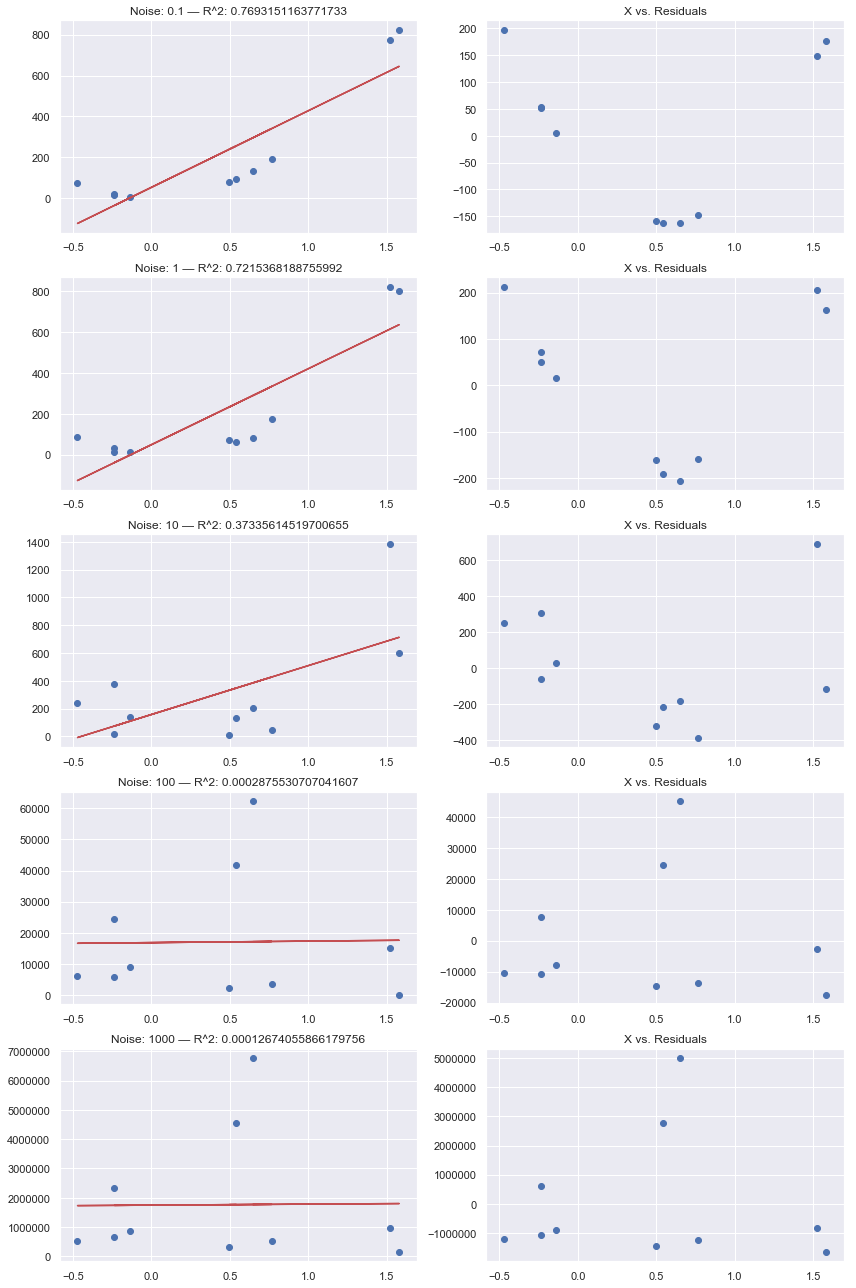

In [69]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options), 2, figsize=(12, 18))

for i, noise in enumerate(noise_options):
    ax_model = axs[i][0]
    ax_residuals = axs[i][1]

    X, y, true_coef = make_regression(
        n_samples=10,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )
    
    y = y ** 2

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model.scatter(X, y)
    ax_model.plot(X, y_predicted, color='r')
    ax_model.set_title("Noise: {} — R^2: {}".format(noise, linreg.score(X, y)))

    residuals = y - y_predicted

    ax_residuals.scatter(X, residuals)
    ax_residuals.set_title("X vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 8: Non-Linear Data / 1 Feature, 1 Informative / 10 Samples / Variable Noise / Non-Linear Attempted Fit (Adding quadratic feature)

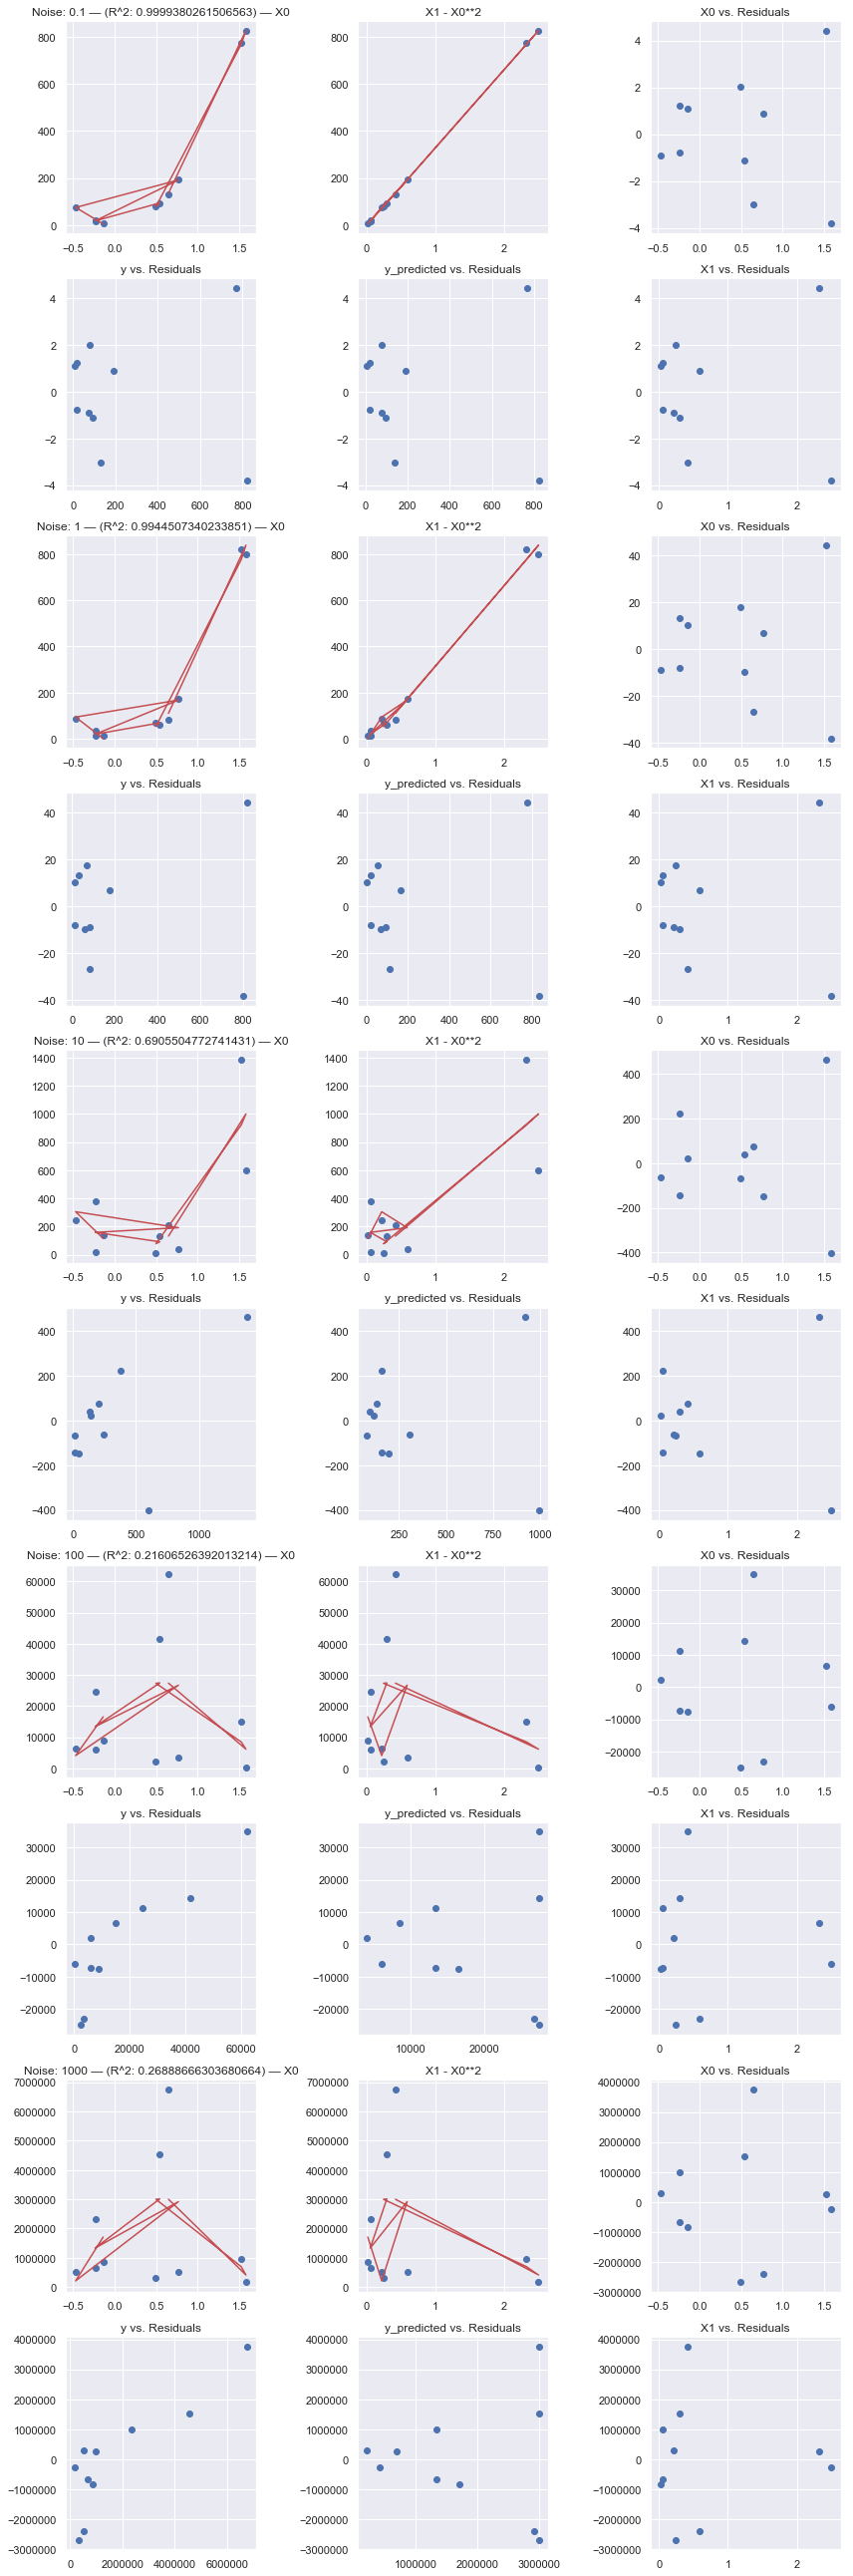

In [70]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=10,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )
    
    X = np.append(X, X**2, axis=1)
    y = y ** 2

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1 - X0**2")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 9: Investigate patterns in plot of y vs. residuals for noisy data / 2 Features

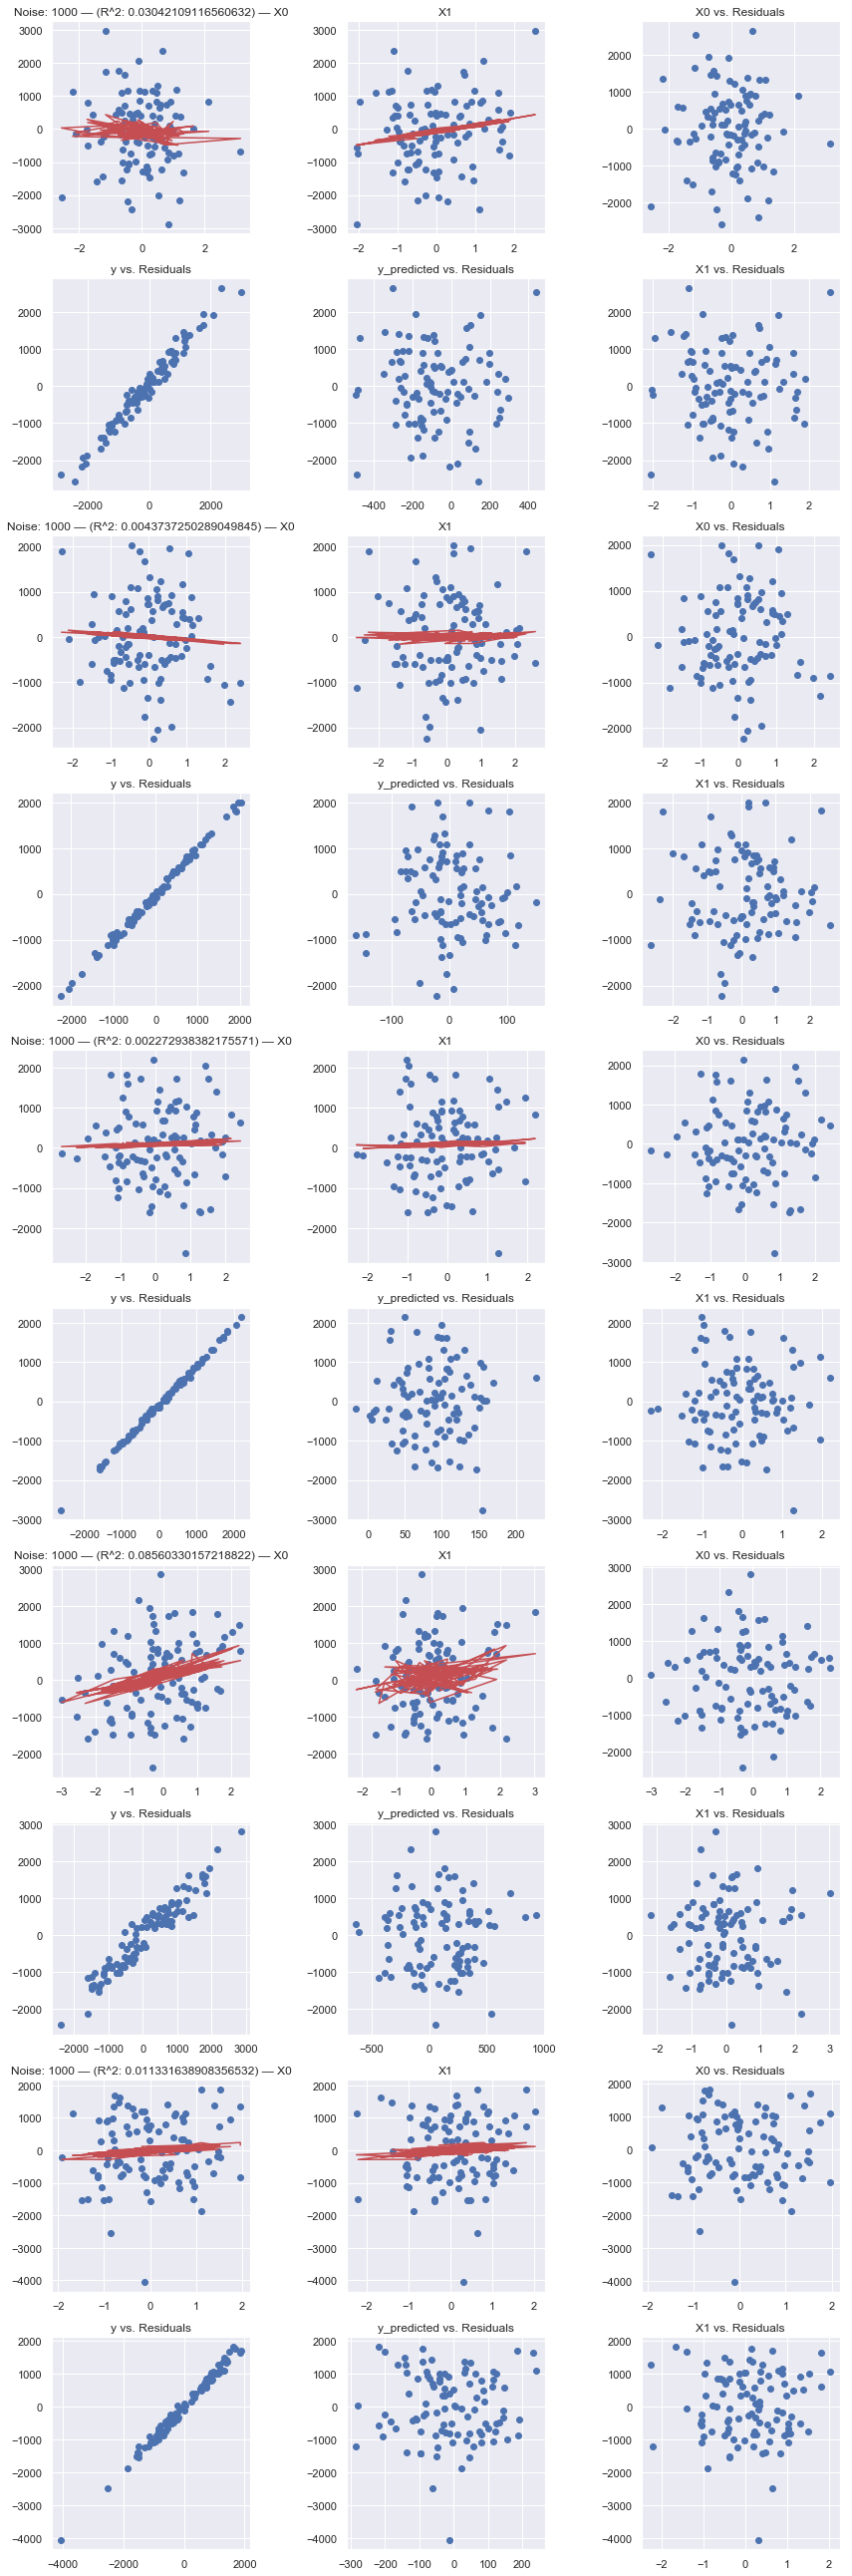

In [71]:
noise_options = [1000]*5

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=2,
        n_informative=2,
        n_targets=1,
        noise=noise,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 10: Investigate patterns in plot of y vs. residuals for noisy data / 1 Feature

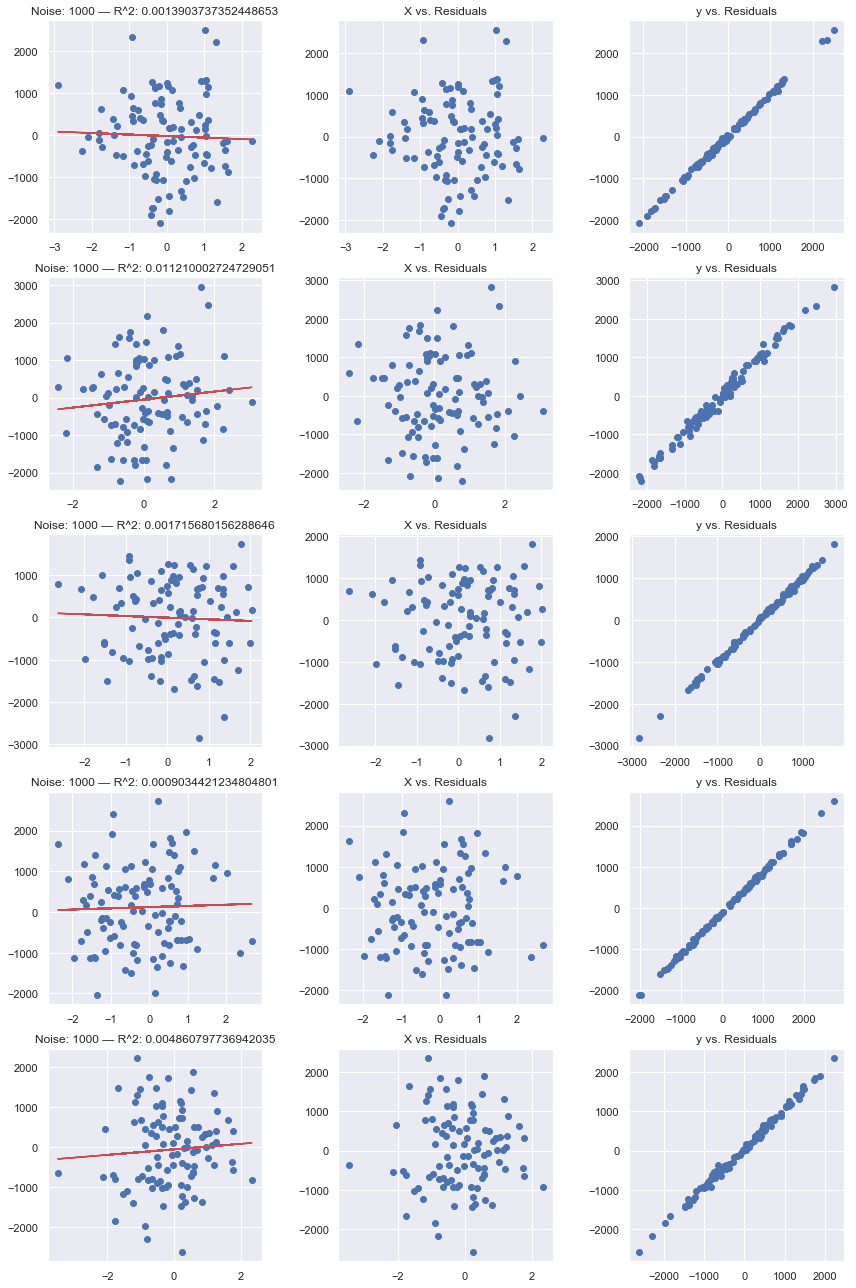

In [72]:
noise_options = [1000]*5

# Setup plotting
fig, axs = plt.subplots(len(noise_options), 3, figsize=(12, 18))

for i, noise in enumerate(noise_options):
    ax_model = axs[i][0]
    ax_residuals_x = axs[i][1]
    ax_residuals_y = axs[i][2]

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        coef=True
    )

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model.scatter(X, y)
    ax_model.plot(X, y_predicted, color='r')
    ax_model.set_title("Noise: {} — R^2: {}".format(noise, linreg.score(X, y)))

    residuals = y - y_predicted

    ax_residuals_x.scatter(X, residuals)
    ax_residuals_x.set_title("X vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")

plt.tight_layout()
plt.show()

# Experiment 11: Investigate patterns in plot of y vs. residuals for noisy data / 1 Feature / Vertically shifted y values

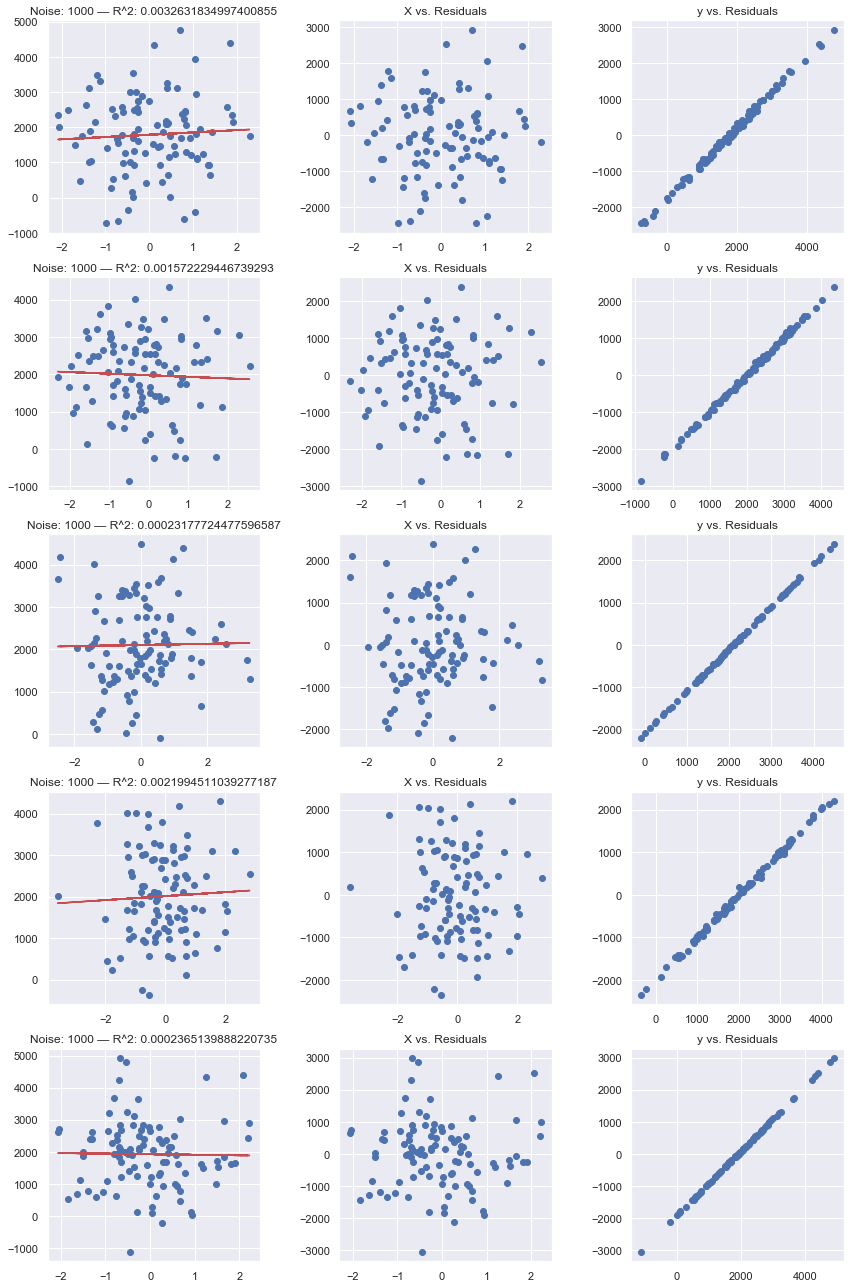

In [73]:
noise_options = [1000]*5

# Setup plotting
fig, axs = plt.subplots(len(noise_options), 3, figsize=(12, 18))

for i, noise in enumerate(noise_options):
    ax_model = axs[i][0]
    ax_residuals_x = axs[i][1]
    ax_residuals_y = axs[i][2]

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        coef=True
    )
    
    y = y + 2000

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model.scatter(X, y)
    ax_model.plot(X, y_predicted, color='r')
    ax_model.set_title("Noise: {} — R^2: {}".format(noise, linreg.score(X, y)))

    residuals = y - y_predicted

    ax_residuals_x.scatter(X, residuals)
    ax_residuals_x.set_title("X vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")

plt.tight_layout()
plt.show()

## Findings: y vs. Residuals
I discovered that it makes sense for the y values and the residuals to be highly correlated for noisy data. Extremely noisy data like we have here looks approximately normally distributed where there's no correlation between X and y. Thus, our fit model goes approxmiately horizontally straight through the data, reflecting the fact that there's very little correlation between the random variables.

Thus, our model is going to predict about the same y value for all x-values. This means all true y values that are much greater than our y-mean will have a highly positive residual, all true y values that are slightly greater than our y-mean will have a slightly positive residual, and so on—and same for the negatives. Thus, we would see that the relationship between our y-values and our residuals looks linear.

# Experiment 12: Non-Linear Data / 1 Feature, 1 Informative / 100 Samples / Variable Noise / Non-Linear Attempted Fit (Adding quadratic feature)

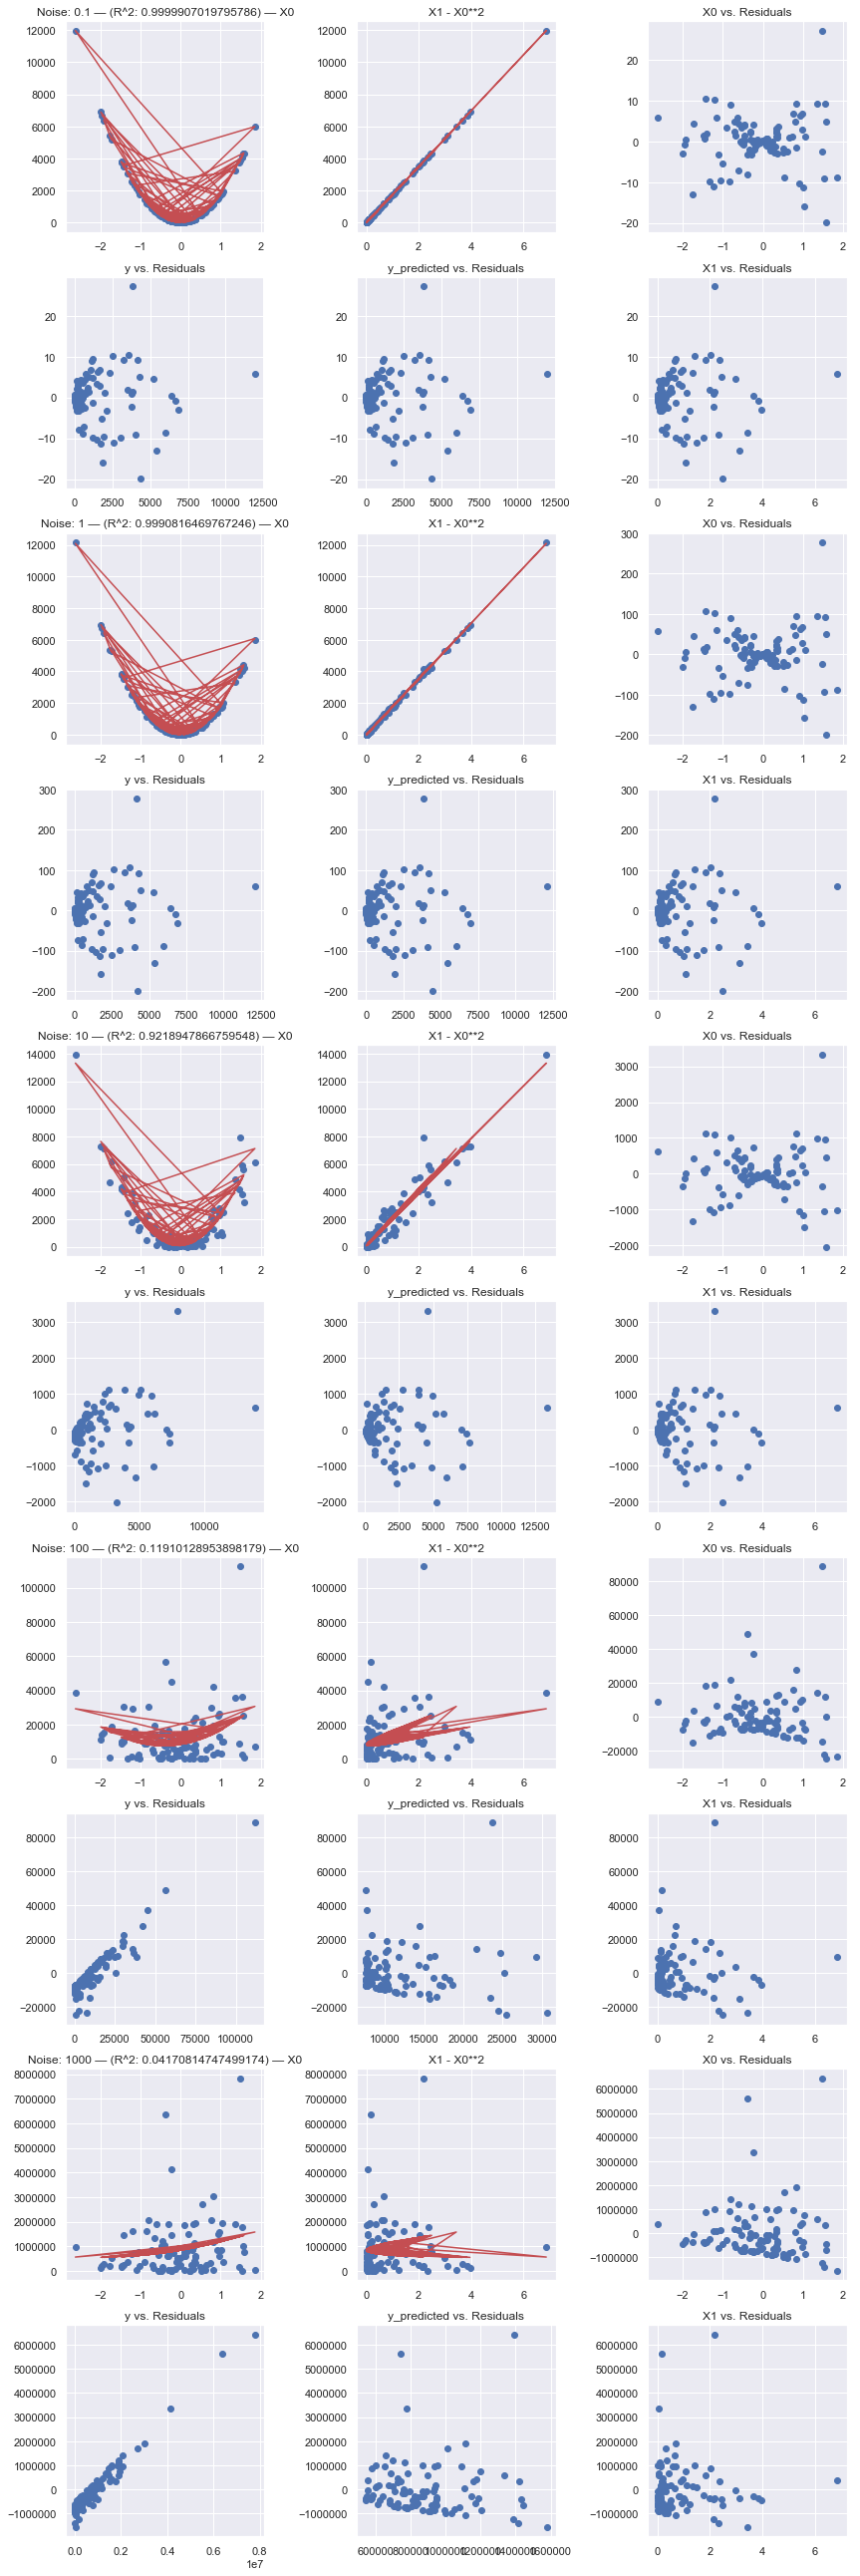

In [74]:
noise_options = (0.1, 1, 10, 100, 1000)

# Setup plotting
fig, axs = plt.subplots(len(noise_options)*2, 3, figsize=(12, 36))

for i, noise in enumerate(noise_options):
    ax_model_x0 = axs[2*i][0]
    ax_model_x1 = axs[2*i][1]
    ax_residuals_x0 = axs[2*i][2]
    ax_residuals_y = axs[2*i+1][0]
    ax_residuals_y_pred = axs[2*i+1][1]
    ax_residuals_x1 = axs[2*i+1][2]
    

    X, y, true_coef = make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        n_targets=1,
        noise=noise,
        random_state=42,
        coef=True
    )
    
    X = np.append(X, X**2, axis=1)
    y = y ** 2

    linreg = LinearRegression()
    linreg.fit(X, y)

    b = linreg.intercept_
    m = linreg.coef_
    
    y_predicted = linreg.predict(X)

    ax_model_x0.scatter(X[:, 0], y)
    ax_model_x0.plot(X[:, 0], y_predicted, color='r')
    ax_model_x0.set_title("Noise: {} — (R^2: {}) — X0".format(noise, linreg.score(X, y)))
    
    ax_model_x1.scatter(X[:, 1], y)
    ax_model_x1.plot(X[:, 1], y_predicted, color='r')
    ax_model_x1.set_title("X1 - X0**2")

    residuals = y - y_predicted

    ax_residuals_x0.scatter(X[:, 0], residuals)
    ax_residuals_x0.set_title("X0 vs. Residuals")
    ax_residuals_y.scatter(y, residuals)
    ax_residuals_y.set_title("y vs. Residuals")
    ax_residuals_y_pred.scatter(y_predicted, residuals)
    ax_residuals_y_pred.set_title("y_predicted vs. Residuals")
    ax_residuals_x1.scatter(X[:, 1], residuals)
    ax_residuals_x1.set_title("X1 vs. Residuals")

plt.tight_layout()
plt.show()